<a href="https://colab.research.google.com/github/Franintodev/Data-Projects/blob/main/climate_change_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Manejo de sistema y rutas
import os
import sys
from pathlib import Path

# Ciencia de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt   # gráficos básicos
import seaborn as sns             # visualizaciones avanzadas

# Preprocesamiento y modelado (Scikit-Learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modelos básicos
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Métricas de evaluación
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             accuracy_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report)

# Deep Learning (opcional, si luego usamos redes neuronales)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Utilidades extra
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
files.upload()  # selecciona kaggle.json

Saving climate_change_indicators.csv to climate_change_indicators.csv


{'climate_change_indicators.csv': b'\xef\xbb\xbfObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,F1971,F1972,F1973,F1974,F1975,F1976,F1977,F1978,F1979,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,F1989,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022\n1,"Afghanistan, Islamic Rep. of",AF,AFG,"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980",Degree Celsius,"Food and Agriculture Organization of the United Nations (FAO). 2022. FAOSTAT Climate Change, Climate Indicators, Temperature change. License: CC BY-NC-SA 3.0 IGO. Extracted from:\xc2\xa0https://www.fao.org/faostat/en/#data/ET. Accessed on 2023-03-28.",ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicators, Sur

In [ ]:
df = pd.read_csv("climate_change_indicators.csv")
print("Shape:", df.shape)
df.head() # Los numeros indican cuántos grados Celsius por encima (o debajo, si fuera negativo) del
 # promedio histórico estuvo la temperatura en ese país o región durante ese año.

Shape: (225, 72)


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [ ]:
df.info()

In [ ]:
df.describe(include="all")

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,225,223,225,225,225,225,225,225,225,...,216.000000,216.000000,216.000000,213.000000,214.000000,213.000000,213.000000,212.000000,213.000000,213.000000
unique,NaN,225,223,225,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,225,225,225,225,225,225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,113.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113
std,65.096083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.321595,0.564903,0.462162,0.401091,0.393999,0.596786,0.467510,0.621930,0.484692,0.669279
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.743500,0.744000,1.017750,1.147000,1.027500,0.865000,1.169000,1.161750,1.019000,0.878000
50%,113.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000,1.327000,1.315000
75%,169.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.187500,1.335500,1.520500,1.714000,1.535000,1.834000,1.698000,1.826250,1.629000,1.918000


In [ ]:
df.isna().sum().sort_values(ascending=False).head(10)

,0
F1977,40
F1963,37
F1985,37
F1975,37
F1965,37
F1964,37
F1961,37
F1984,37
F1991,37
F1978,36


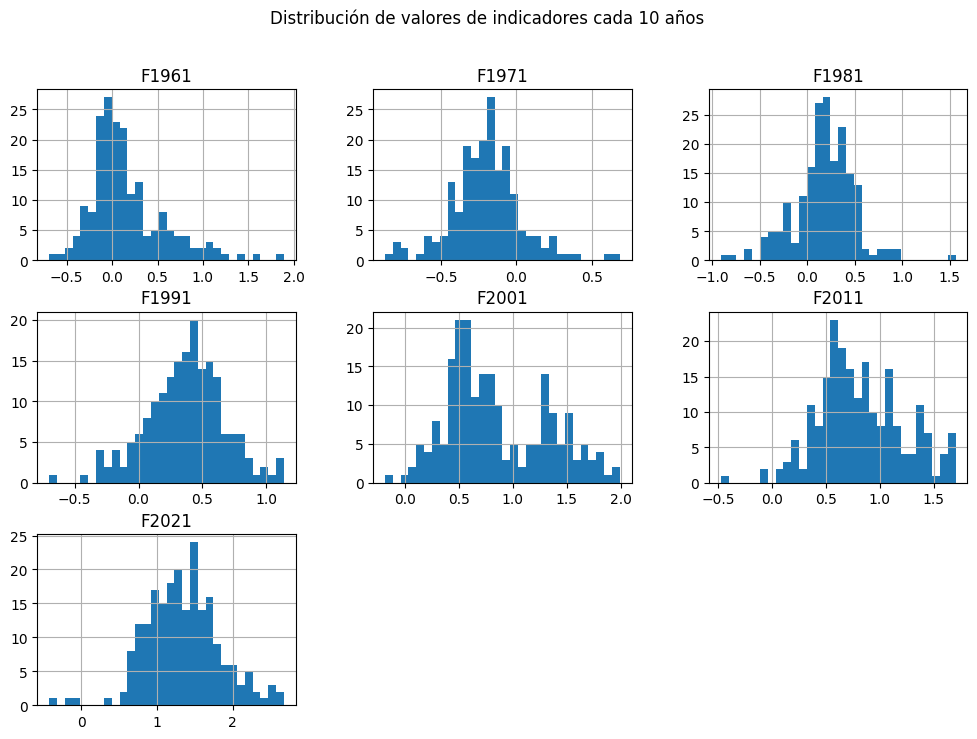

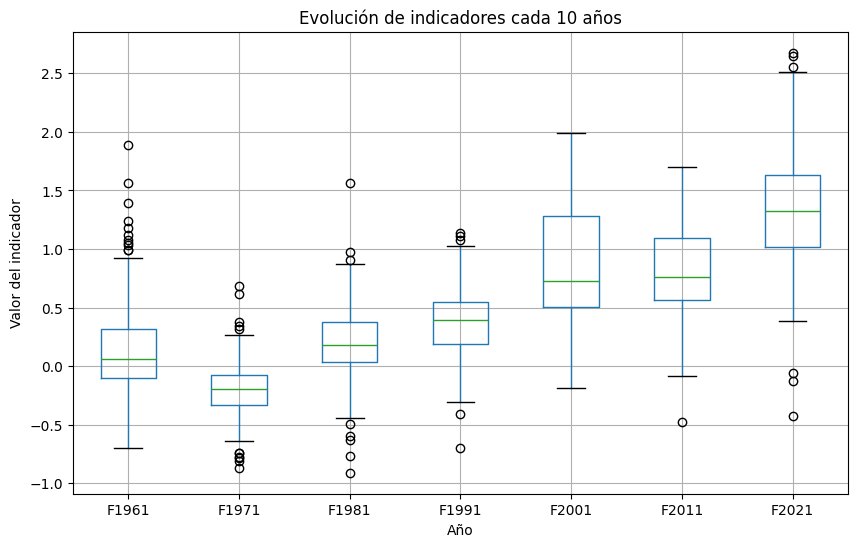

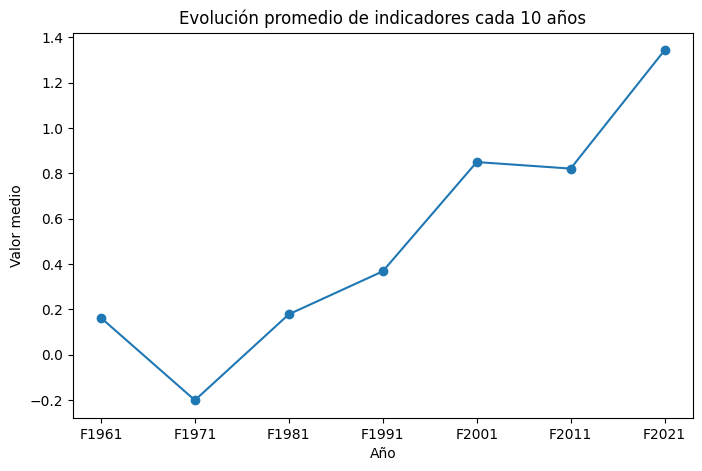

In [ ]:
# Años de interés
cols = ["F1961", "F1971", "F1981", "F1991", "F2001", "F2011", "F2021"]

# Subset del DataFrame
df_years = df[cols]

# Histograma comparativos
df_years.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribución de valores de indicadores cada 10 años")
plt.show()

# Boxplots para comparar más fácil
plt.figure(figsize=(10,6))
df_years.boxplot()
plt.title("Evolución de indicadores cada 10 años")
plt.ylabel("Valor del indicador")
plt.xlabel("Año")
plt.show()

# Línea de tendencia global
means = df_years.mean()
means.plot(marker="o", figsize=(8,5))
plt.title("Evolución promedio de indicadores cada 10 años")
plt.ylabel("Valor medio")
plt.xlabel("Año")
plt.show()




In [ ]:
# Histogramas (distribución por año)

# Eje X → cuántos grados Celsius por encima (o debajo, si fuera negativo) del promedio histórico estuvo la temperatura en ese país o región durante ese año.
# Eje Y → cantidad de países que tienen un valor dentro de ese rango.

# F1961 y F1971 → las distribuciones se concentran cerca de 0 °C, incluso con valores negativos → había países con temperaturas por debajo del promedio histórico.
# F1981–F1991 → el centro de la distribución se desplaza hacia valores positivos (0.2–0.5 °C).
# F2001–F2011 → mayor dispersión: algunos países ya alcanzan anomalías de +1.5 °C.
# F2021 → clara concentración alrededor de 1–2 °C, confirmando el aumento global.

# La distribución de valores se corre progresivamente hacia la derecha → el planeta se está calentando en todas las regiones.

In [ ]:
# Boxplots (comparación de la variabilidad cada década)

# La línea verde dentro de la caja representa la mediana, es decir, el valor central: el 50% de los países están por encima y el 50% por debajo. La mediana sube progresivamente a lo largo de las décadas, mostrando un aumento sistemático de la temperatura global.
# Los bordes de la caja representan el rango intercuartílico (IQR): El límite inferior (Q1) = 25% de los países tienen valores menores. El límite superior (Q3) = 75% de los países tienen valores menores.
# El rango intercuartílico se ensancha, lo que significa que la dispersión entre países aumenta: algunos se calientan mucho más rápido que otros.
# Los círculos fuera de los bigotes son outliers, países con anomalías de temperatura muy distintas al resto. La presencia de outliers altos en 2001–2021 indica países con anomalías extremas, mucho mayores al promedio global.

In [ ]:
# Línea de promedio por década

# La curva muestra un crecimiento casi exponencial:
# 1961–1971 → valores cercanos a cero.
# 1981–1991 → sube suavemente, cerca de 0.4 °C.
# 2001–2011 → cruza la barrera del 0.8 °C.
# 2021 → alcanza 1.3–1.4 °C de anomalía promedio.
# El promedio global ya supera el umbral de 1 °C y se acerca rápidamente al límite de 1.5 °C del Acuerdo de París.